Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user adoption .


In [2]:
import pandas as pd
import numpy as np
import datetime

In [6]:
# Date always have a different format, they can be parsed using a specific parse_dates function.
user_engagement_df = pd.read_csv("takehome_user_engagement.csv", parse_dates=['time_stamp'])

In [7]:
user_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [10]:
# unable to read takehome_users.csv using standared encoding format utf-8 we need to find the encoding format
with open("takehome_users.csv") as f:
    print(f.encoding)

cp1252


In [19]:
users_df = pd.read_csv("takehome_users.csv", parse_dates=["creation_time", "last_session_creation_time"], encoding="cp1252")

In [20]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [21]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [22]:
# only invited_by_user_id is in float64, we need to convert to int
# There seeems to be some null values so we need to replace those values
users_df['invited_by_user_id'] = users_df["invited_by_user_id"].fillna(0).astype(int)

In [23]:
# Checking max and min time engagement
print(user_engagement_df.time_stamp.min())
print(user_engagement_df.time_stamp.max())

2012-05-31 08:20:06
2014-06-06 14:58:50


In [24]:
# Creating new colum to store only date value
user_engagement_df['date'] = user_engagement_df['time_stamp'].dt.date

<AxesSubplot:title={'center':'Activity per Day'}, xlabel='date'>

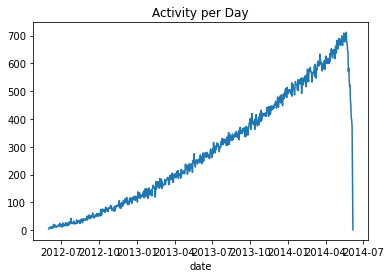

In [25]:
# With newely created column we can check trend of user
user_engagement_df.groupby(['date'])['user_id'].count().plot(title="Activity per Day")

In [26]:
# Maximum users
user_engagement_df.groupby(['date'])['user_id'].count().max()

712

<AxesSubplot:title={'center':'Activity Last 20 Dates'}, xlabel='date'>

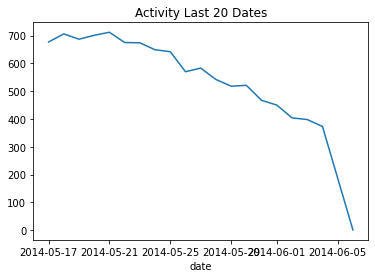

In [27]:
# There seems to be drop in last few dates so we can take a close look at those data
user_engagement_df.groupby(['date'])['user_id'].count().tail(20).plot(title="Activity Last 20 Dates")

In [28]:
# Last day index
user_engagement_df[user_engagement_df['time_stamp'] >= '2014-06-06']

,time_stamp,user_id,visited,date
70763,2014-06-06 14:58:50,4051,1,2014-06-06


In [29]:
# Drop last day data which have only one user visited
user_engagement_df.drop(user_engagement_df.index[70763], inplace=True)

In [30]:
# Count user visits
user_visit_count = user_engagement_df.groupby(['user_id'])['visited'].sum().to_frame()

<AxesSubplot:title={'center':'Frequency of Number of Visits'}, ylabel='Frequency'>

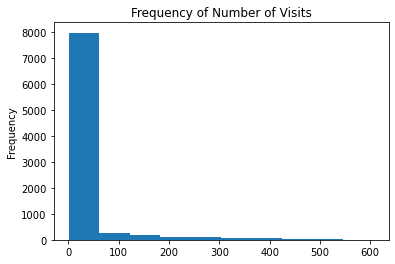

In [32]:
user_visit_count["visited"].plot(kind="hist", bins=10, title="Frequency of Number of Visits")

In [33]:
user_visit_count[user_visit_count["visited"] <= 20].groupby(['visited'])['visited'].count()

visited
1     6234
2      340
3      241
4      181
5      110
6       85
7       68
8       57
9       48
10      34
11      26
12      29
13      29
14      30
15      13
16      20
17      18
18      18
19      12
20      16
Name: visited, dtype: int64

In [34]:
print("Precentage of users who logged in once: "+"{:.1%}".format(6234/12000))

Precentage of users who logged in once: 51.9%


In [36]:
print("Precentage of users who never logged in: "+"{:.1%}".format(1-len(user_visit_count) / len(users_df)))

Precentage of users who never logged in: 26.5%


In [37]:
print("Users invited: ", 12000-5583)
print("Precentage of user invited: "+"{:.1%}".format(1-5583/12000))

Users invited:  6417
Precentage of user invited: 53.5%


<AxesSubplot:title={'center':'Creation Source Count'}, xlabel='creation_source'>

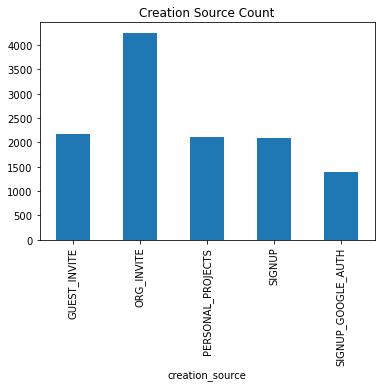

In [38]:
users_df.groupby(['creation_source'])['creation_source'].count().plot(kind="bar", title="Creation Source Count")

In [44]:
# Weekly visit counts by user
engagement_weekly = user_engagement_df.groupby([pd.Grouper(key='time_stamp', freq='W'), 'user_id']).visited.sum().to_frame()

In [45]:
engagement_weekly.reset_index(inplace=True)

In [46]:
engagement_weekly.user_id[engagement_weekly.visited >= 3].nunique()

1445

In [47]:
# Three or more visits within a week
adopted_users = engagement_weekly[engagement_weekly.visited >= 3].groupby(['user_id'])['visited'].sum().to_frame()

In [48]:
adopted_users['adopted'] = 1
adopted_users.head()

,visited,adopted
user_id,,
2,3,1
10,249,1
20,3,1
33,3,1
42,331,1


In [53]:
# Binary column for invited_by_user_id
users_df['invited']= users_df['invited_by_user_id'].apply(lambda x: 0 if x == 0 else 1)

In [54]:
# Add visit count by user
users_df = users_df.join(user_visit_count)

In [55]:
# Fill null value and , convert data typr
users_df["last_session_creation_time"] = users_df["last_session_creation_time"].fillna(0)
users_df["visited"] = users_df["visited"].fillna(0).astype(int)

In [57]:
# Add target - adopted
users_df = users_df.join(adopted_users["adopted"])

In [58]:
users_df["adopted"] = users_df["adopted"].fillna(0).astype(int)

In [59]:
# Add email domain
users_df['domain'] = users_df['email'].apply(lambda x: x.split('@')[1])

In [60]:
users_df.domain.nunique()

1184

In [61]:
# Top 10 Domain 
users_df.domain.value_counts().head(10)

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
qgjbc.com            2
mumdc.com            2
rerwl.com            2
luque.com            2
Name: domain, dtype: int64

In [62]:
# Onl first 6 seems to have more data so we can name all other as oters domain
list_of_domains = ["gmail.com", "yahoo.com", "jourrapide.com", "cuvox.de", "gustr.com", "hotmail.com"]

In [64]:
users_df['domains'] = users_df['domain'].apply(lambda x: x if x in list_of_domains else 'other')

In [65]:
# Get dummies for email domain
users_df = pd.get_dummies(users_df, columns=['domains'])

In [66]:
# Get dummies for Creation Source
users_df = pd.get_dummies(users_df, columns=['creation_source'])

In [67]:
# Drop fields not used
df = users_df.drop(['creation_time', 'name', 'email', 'last_session_creation_time', 'invited_by_user_id', 'domain'], axis=1)

In [68]:
df.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited', 'visited', 'adopted', 'domains_cuvox.de',
       'domains_gmail.com', 'domains_gustr.com', 'domains_hotmail.com',
       'domains_jourrapide.com', 'domains_other', 'domains_yahoo.com',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

Logistic Regression for binary classification, Target variable = "Adopted"

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [70]:
# Separate X, y, train, test, validate samples
y = df.adopted
X = df.drop(['adopted'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7, stratify=y)

In [71]:
# Steps, pipeline, scale, fit
steps = [('scaler', StandardScaler()), ('logreg', LogisticRegression(random_state = 7))]
pipeline = Pipeline(steps)
logreg_scaled = pipeline.fit(X_train, y_train)

In [72]:
# Accuracy on testing
print("The testing accuracy is "+"{:.1%}".format(logreg_scaled.score(X_test, y_test)))

The testing accuracy is 98.6%


In [73]:
# 5-fold cross-validation scores
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.98291667 0.98583333 0.98708333 0.98333333 0.97708333]
Average 5-Fold CV Score: 0.98325


In [74]:
features = list(X)

In [75]:
# Check coefficients
logreg = LogisticRegression(random_state = 7)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
logreg.fit(X_train,y_train)
std_coef = logreg.coef_.reshape(-1,1).tolist()
feature_names = [feature.title() for feature in features]
coef_df = pd.DataFrame(std_coef,index=feature_names,columns=['coef'])
coef_df['abs'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs',ascending=False).drop('abs',axis=1)
pd.set_option('display.max_rows', None)
print(coef_df)

                                        coef
Creation_Source_Signup_Google_Auth -1.399082
Creation_Source_Personal_Projects  -1.268463
Domains_Jourrapide.Com             -1.073931
Invited                            -0.832530
Domains_Cuvox.De                   -0.673032
Domains_Yahoo.Com                  -0.637191
Domains_Gustr.Com                  -0.512647
Visited                             0.511364
Creation_Source_Org_Invite         -0.429630
Domains_Hotmail.Com                -0.421876
Creation_Source_Guest_Invite       -0.402899
Domains_Other                      -0.275457
Creation_Source_Signup             -0.274263
Domains_Gmail.Com                  -0.180204
Enabled_For_Marketing_Drip          0.109612
Opted_In_To_Mailing_List            0.015774
Org_Id                             -0.000112


d:\study\ds\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The accuracy of the model is 98.7% and the model uses some email domains and creation sources as top features.

Specifically, user accounts emailing from Jourrapide.com and created through Google_Auth or Personal Projects are most likely to become adopted users. Additional benefit comes if a new user was invited by an existing user